# Online Shoppers Purchasing Intention
In the data set attached you have users Web behavior during the last year. In order to optimize the user acquisition decisions, we want to predict the Online Shoppers Purchasing Intention. The best approach for this business need is to create a prediction model.
model (including all the data-preparation and cleaning process) in Python.
1. Which model do you think is the best fit for this business need? Why?
This 

>This is a classification problem, there are several options:
SGD, RF, XGboost, Catboost.
After some experimentation, the catboost model is the one that performed the best.

2. Please shortly describe what the model does.

>CatBoost is based on gradient boosted decision trees. During training, a set of decision trees is built consecutively. Each successive tree is built with reduced loss compared to the previous trees.

3. What are the limitation of the model?

>One disadvantage of boosting is that it is sensitive to outliers since every classifier is obliged to fix the errors in the predecessors. Thus, the method is too dependent on outliers. Another disadvantage is that the method is almost impossible to scale up. This is because every estimator bases its correctness on the previous predictors, thus making the procedure difficult to streamline.

4. Model Evaluation Plan – How will you split the data? How will you test the accuracy of the test?

>The data will be split in 2 parts, the train(80%) and the test set(20%). The data is unbalance (84% False / 16% True) the problem is that the accuracy of a guessing model will achieve 84% of accuracy.

5. Business - Sanity Evaluation Plan – How will you make sure that your solution will have a valid contribution to the business bottom line?

>To be sure that the model will bring a business advantage, we will check the Recall, Precision and F1 score on the test data that our model never seen before.
>The second part will to track the performance of the model in production.

# 1. Problem definition
>How well can we predict the online shoppers purchasing intention, given its characteristics and previous examples of similar client's information.
#2. data 
The data is downloaded from the UCI Online Shoppers Purchasing Intention Dataset.
https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

**Data Set Information:**

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

*   The dataset consists of 10 numerical and 8 categorical 
*   The 'Revenue' attribute can be used as the class label.

#3.Evaluation
The evaluation metric for this project is the F1-score  between the actual and predicted revenue .
#4. Features
* Administrative - count of pages visited by the visitor (e.g. user details and account)
* Administrative_Duration - total time spent (seconds) in on Administrative type of page
Informational - count of pages visited by the visitor (e.g. about and contact of the website)
* Informational_Duration - total time spent (seconds) in on Informational type of page
* ProductRelated - count of pages visited by the visitor (e.g. product details)
* ProductRelated_Duration - total time spent (seconds) in on ProductRelated type of page
* BounceRates - percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server
* ExitRates - the percentage of visitors to a page on the website from which they exit the website to a different website
PageValues - the average value for a page that a user visited before landing on the goal page
* SpecialDay - indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day)
* Month - the month of the visit to the website
* OperatingSystems - the type of operation system used by the visitor
* Browser - the type of browser used by the visitor
* Region - the geographic region from which the session started
* TrafficType - describes how traffic arrived on the website (Direct, Organic, Referral, Social, Email, Display and Paid)
* VisitorType - returning or new visitor or other
* Weekend - indicating whether the date of the visit is weekend
* Revenue: indicates whether the visitor made a purchase or not

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Load the data

In [ ]:
#load the data 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv

--2021-12-14 07:36:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1072063 (1.0M) [application/x-httpd-php]
Saving to: ‘online_shoppers_intention.csv.3’

online_shoppers_int 100%[===================>]   1.02M  1.32MB/s    in 0.8s    

2021-12-14 07:36:08 (1.32 MB/s) - ‘online_shoppers_intention.csv.3’ saved [1072063/1072063]



In [ ]:
df=pd.read_csv('/content/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
#Check if there is  missing data
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

Revenue                    0.0
Weekend                    0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Administrative             0.0
dtype: float64

In [ ]:
#check the duplicate 
print(f"shape with duplicate {df.shape}", f"\n\nnumber of duplicate {df.duplicated().value_counts()}")
#drop the duplicate
df.drop_duplicates(inplace=True)
print(f"\n \nshape after removing the duplicate {df.shape}")

shape with duplicate (12330, 18) 

number of duplicate False    12205
True       125
dtype: int64

 
shape after removing the duplicate (12205, 18)


# EDA 

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


In [ ]:
#Our target data
df['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [ ]:
#boolean to numeric
df['Revenue']=df['Revenue'].astype(int)

## Target variable

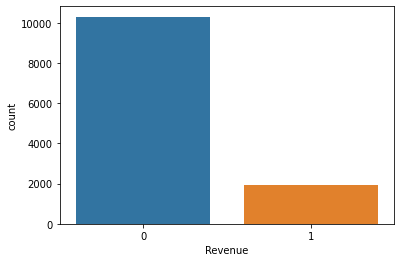

In [ ]:
#Our target variable
ax = sns.countplot(x="Revenue", data=df)

In [ ]:
df["Revenue"].value_counts(normalize=True)

0    0.843671
1    0.156329
Name: Revenue, dtype: float64

* The dataset is unbalance with 85% False and 15% True on our target variable.

**Note:** Potentially use a data augmentation, avoid the accuracy metric.

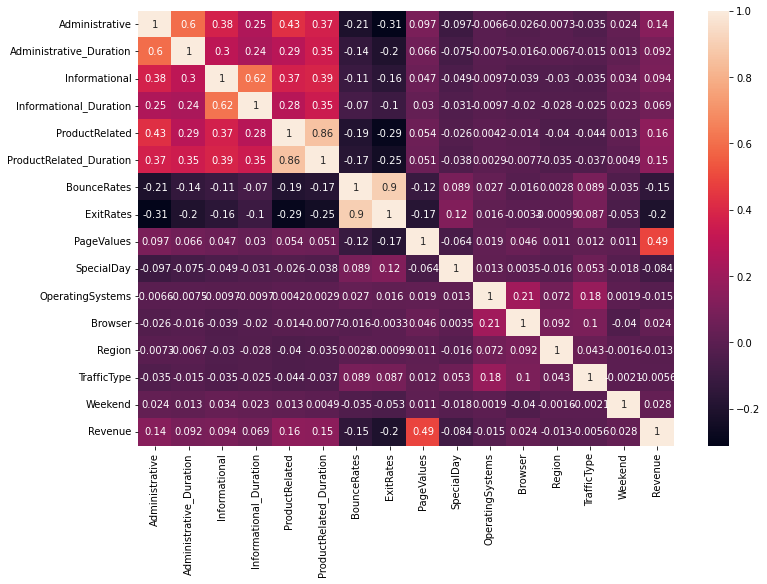

In [ ]:
#plot the correlation
plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(),annot=True)

* Our target variable is strongly related to PageValue
* Administrative, Admnistrative_duration, Informational, Information_duration, produt Related, productRelated are strongly related.
* Bounce rate and exit rate are highly correlated

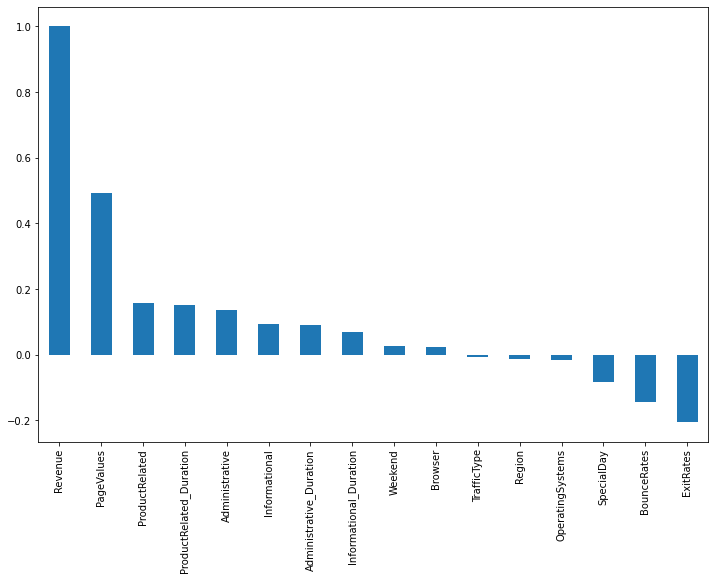

In [ ]:
#Let's look at the relation between the target and the other variables
plt.figure(figsize=(12,8))
df.corr()['Revenue'].sort_values(ascending=False).plot(kind="bar")

In [ ]:
df.groupby('Revenue')['PageValues'].describe().transpose()

Revenue,0,1
count,10297.000000,1908.000000
mean,1.999985,27.264518
std,9.124701,35.191954
min,0.000000,0.000000
25%,0.000000,3.641144
50%,0.000000,16.758134
75%,0.000000,38.897742
max,246.758590,361.763742


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


## Region

In [ ]:
print(df["Region"].dtypes,df["Region"].value_counts())

int64 1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64


In [ ]:
df['Region']=df['Region'].astype("string")

## Product related VS ProductRelated_duration

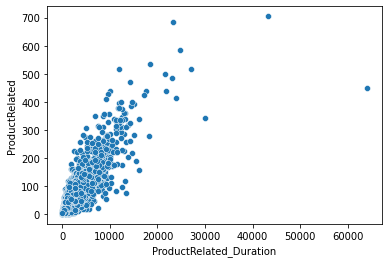

In [ ]:
ax = sns.scatterplot(x="ProductRelated_Duration", y="ProductRelated", data=df)

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

## Administrative VS Administrative duration

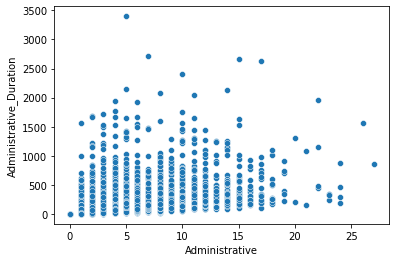

In [ ]:
ax = sns.scatterplot(x="Administrative", y="Administrative_Duration", data=df)

## Bounce rate VS Revenue

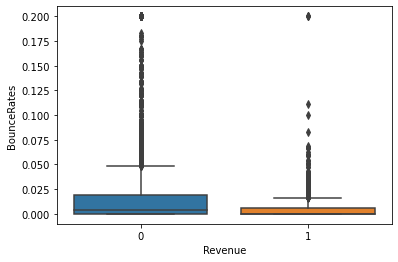

In [ ]:
ax = sns.boxplot(x="Revenue", y="BounceRates", data=df)


## Exit rate vs Revenue

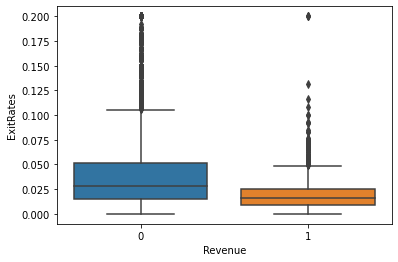

In [ ]:
ax = sns.boxplot(x="Revenue", y="ExitRates", data=df)

## Bounce rate vs Exit Rate

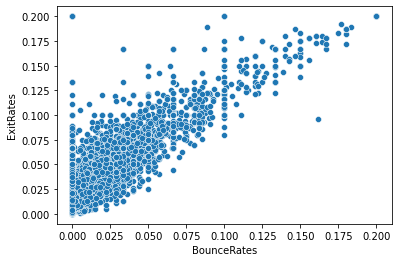

In [ ]:
ax = sns.scatterplot(x="BounceRates", y="ExitRates", data=df)

### Let's look at our categorical variable month


In [ ]:
df.Month.nunique()

10

We have potentially 2 months are missing

In [ ]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

### Month VS Target variable

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def chi_square(column_1, column_2):
  """
  This function help to identify if our variable are independent or dependent
  """
  data_crosstab = pd.crosstab(column_1,column_2, margins = False)

  stat, p, dof, expected = chi2_contingency(data_crosstab)

    #We put our degree of significance at 95%
  prob = 0.95
  critical = chi2.ppf(prob, dof)
  if abs(stat) >= critical:
    print('Dependent (reject H0), our variable could be a candidate to predict our target')
  else:
    print("Independent (fail to reject H0), our variable couldn't be a candidate to predict our target")

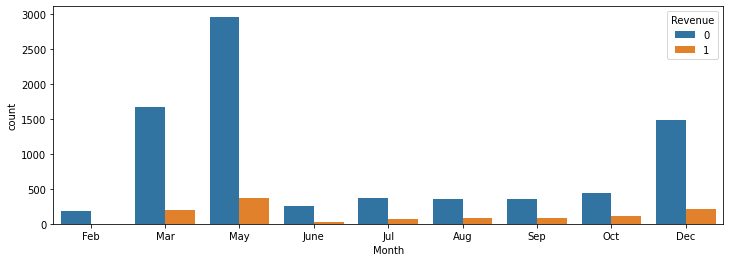

In [ ]:
#Our target variable
plt.figure(figsize=(12,4))
month_order=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Dec']
sns.countplot(x='Month',data=df,order=month_order,hue='Revenue');

In [ ]:
chi_square(column_1=df['Month'], column_2=df['Revenue'])

Dependent (reject H0), our variable could be a candidate to predict our target


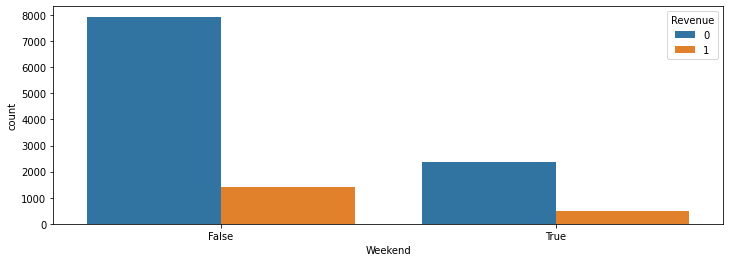

In [ ]:
#Weekend 
plt.figure(figsize=(12,4))
sns.countplot(x='Weekend',data=df,hue='Revenue')

In [ ]:
chi_square(column_1=df['Weekend'], column_2=df['Revenue'])

Dependent (reject H0), our variable could be a candidate to predict our target


The churn seems to increase the weekend.

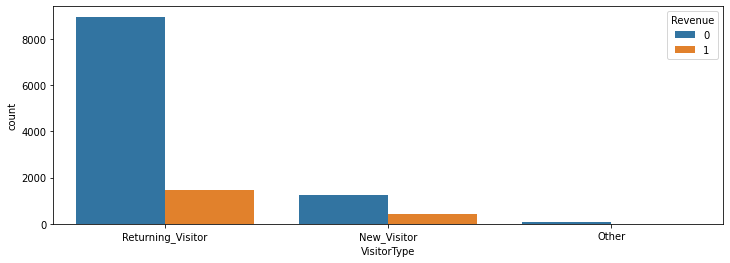

In [ ]:
#Visitor type
plt.figure(figsize=(12,4))
sns.countplot(x='VisitorType',data=df,hue='Revenue')

In [ ]:
chi_square(column_1=df['VisitorType'], column_2=df['Revenue'])

Dependent (reject H0), our variable could be a candidate to predict our target


The type of visitor seems to imapct our target variable, let's confirm it with chi square.

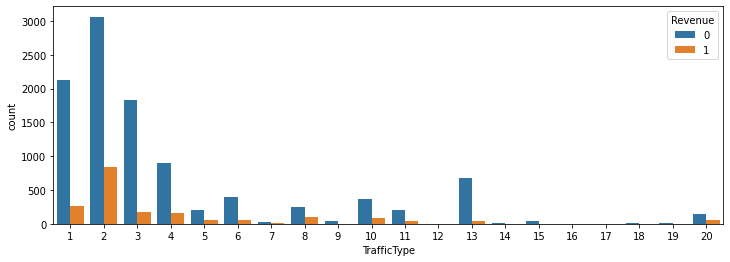

In [ ]:
#Visitor type
plt.figure(figsize=(12,4))
sns.countplot(x='TrafficType',data=df,hue='Revenue')

In [ ]:
chi_square(column_1=df['TrafficType'], column_2=df['Revenue'])

Dependent (reject H0), our variable could be a candidate to predict our target


## browser

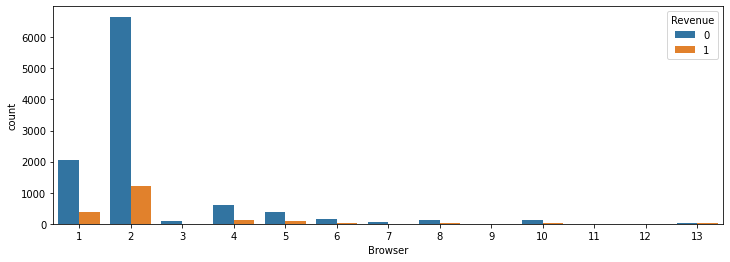

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Browser',data=df,hue='Revenue')

In [ ]:
chi_square(column_1=df['Browser'], column_2=df['Revenue'])

Dependent (reject H0), our variable could be a candidate to predict our target


## OperatingSystems

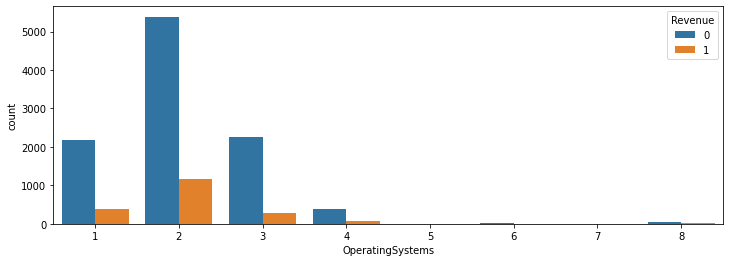

In [ ]:

plt.figure(figsize=(12,4))
sns.countplot(x='OperatingSystems',data=df,hue='Revenue')

In [ ]:
chi_square(column_1=df['OperatingSystems'], column_2=df['Revenue'])

Dependent (reject H0), our variable could be a candidate to predict our target


## Special day

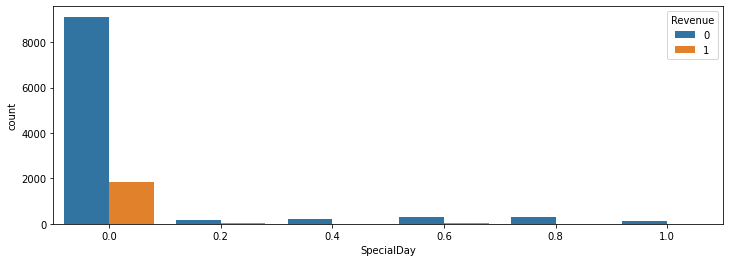

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='SpecialDay',data=df,hue='Revenue')

In [ ]:
chi_square(column_1=df['SpecialDay'], column_2=df['Revenue'])

Dependent (reject H0), our variable could be a candidate to predict our target


#feature engineering 

In [ ]:
df_temp=df.copy()

In [ ]:
df_temp.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
df_temp['TotalPages'] = df_temp['Administrative'] + df_temp['Informational'] + df_temp['ProductRelated']
df_temp['Duration']=df_temp['Administrative_Duration'] + df_temp['Informational_Duration'] + df_temp['ProductRelated_Duration']

In [ ]:
df_temp.corr()['Revenue']

Administrative             0.136330
Administrative_Duration    0.091768
Informational              0.093626
Informational_Duration     0.069358
ProductRelated             0.156042
ProductRelated_Duration    0.150077
BounceRates               -0.145091
ExitRates                 -0.204320
PageValues                 0.491894
SpecialDay                -0.083601
OperatingSystems          -0.014927
Browser                    0.024052
TrafficType               -0.005618
Weekend                    0.027729
Revenue                    1.000000
TotalPages                 0.161535
Duration                   0.153720
Name: Revenue, dtype: float64

Not bad, the duration is much more correlated to the target variables than all the duration sperately.
Same for the total pages and all the number of pages separtely.

# Preparation of the data 

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  string 
 14  TrafficType           

## weekend

In [ ]:
df_temp['Weekend']=df_temp['Weekend'].astype(int)

## Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Encoding categorical attributes
categorical = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
enc = OneHotEncoder(handle_unknown='ignore')
transformer = enc.fit_transform(df_temp.loc[:, categorical].values)

enc_data = pd.DataFrame(
    transformer.toarray(), 
    index=df_temp.index.values,
    columns=enc.get_feature_names(categorical))
encode_df_temp = pd.merge(df_temp, enc_data, left_index=True, right_index=True)
encode_df_temp.drop(columns=categorical, inplace=True)
print("Done")



Done


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Create a train and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=encode_df_temp.drop("Revenue", axis=1)
y=encode_df_temp['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X_train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,TotalPages,Duration,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.00000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000
mean,2.357845,82.733890,0.512905,34.441053,32.201045,1210.563767,0.020344,0.041388,5.894154,0.064031,0.236276,35.071794,1327.738710,0.035334,0.137853,0.014748,0.034617,0.022224,0.153011,0.274887,0.245186,0.045576,0.036563,0.210467,0.534515,0.207087,0.039123,0.000512,0.001844,0.000717,0.005735,0.200635,0.642052,0.009115,0.059607,0.038918,0.013929,0.004097,0.011676,0.000102,0.013826,0.000512,0.000717,0.004814,0.384269,0.092175,0.197870,0.097296,0.026321,0.064215,0.060324,0.035846,0.041684,0.196129,0.320156,0.163458,0.086235,0.022020,0.036973,0.003482,0.028267,0.003073,0.036460,0.020176,0.000102,0.061450,0.001024,0.00338,0.000102,0.000102,0.000922,0.001127,0.015363,0.138161,0.006350,0.855490
std,3.332379,177.313819,1.290427,137.407018,45.291384,1950.160335,0.045196,0.046131,18.441877,0.202304,0.424815,47.363325,2072.801549,0.184632,0.344764,0.120549,0.182817,0.147420,0.360017,0.446480,0.430220,0.208574,0.187696,0.407661,0.498833,0.405239,0.193898,0.022625,0.042899,0.026767,0.075519,0.400496,0.479421,0.095042,0.236769,0.193411,0.117201,0.063877,0.107426,0.010120,0.116776,0.022625,0.026767,0.069216,0.486447,0.289288,0.398414,0.296376,0.160097,0.245149,0.238098,0.185915,0.199876,0.397087,0.466560,0.369802,0.280725,0.146755,0.188704,0.058910,0.165743,0.055348,0.187443,0.140610,0.010120,0.240167,0.031988,0.05804,0.010120,0.010120,0.030348,0.033547,0.122996,0.345086,0.079437,0.351625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We saw in the exploration a lot of outliers a robust scaller with be a good approach to scale our data

# Modelling

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

## Model 0: Logist Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_0 = LogisticRegression()
model_0.fit(X_train, y_train)
y_pred = model_0.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
result_model_0=calculate_results(y_true=y_test, y_pred=y_pred)
result_model_0

{'accuracy': 88.11962310528472,
 'f1': 0.8629141260524125,
 'precision': 0.8720304440192691,
 'recall': 0.8811962310528472}

## Model 1: Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

In [ ]:
result_model_1=calculate_results(y_true=y_test, y_pred=y_pred)
result_model_1

{'accuracy': 89.71732896353953,
 'f1': 0.8880859990460245,
 'precision': 0.8898115481914777,
 'recall': 0.8971732896353953}

## Model 2: Xgboost


In [ ]:
import time
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
# create a default XGBoost classifier
model_2 = XGBClassifier(n_estimators=500)
# fit the model
%time model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)



CPU times: user 9.22 s, sys: 27.6 ms, total: 9.25 s
Wall time: 9.23 s


In [ ]:
result_model_2=calculate_results(y_true=y_test, y_pred=y_pred)
result_model_2

{'accuracy': 90.20893076607948,
 'f1': 0.8977218158853346,
 'precision': 0.8964283270633338,
 'recall': 0.9020893076607948}

## Model 3: Catboost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
model_3 = CatBoostClassifier(iterations=1000,                          
                           devices='0:1',
                           verbose=0)
%time model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)

CPU times: user 10.3 s, sys: 844 ms, total: 11.1 s
Wall time: 6 s


In [ ]:
result_model_3=calculate_results(y_true=y_test, y_pred=y_pred)
result_model_3

{'accuracy': 90.33183121671446,
 'f1': 0.89906903923044,
 'precision': 0.8978245866958089,
 'recall': 0.9033183121671446}

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2045
           1       0.75      0.61      0.67       396

    accuracy                           0.90      2441
   macro avg       0.84      0.78      0.81      2441
weighted avg       0.90      0.90      0.90      2441



# Experimentation to improve the best model

The model 3 performed better than all the other models, the data were 

## Model 4 - Model 3 with smote data

In [ ]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [ ]:
# define pipeline
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
                           

In [ ]:
X_train_smote, y_train_smote = pipeline.fit_resample(X_train, y_train)

In [ ]:
from catboost import CatBoostClassifier
model_4 = CatBoostClassifier(iterations=1000,                          
                           devices='0:1',
                           verbose=0)
%time model_4.fit(X_train_smote, y_train_smote)
y_pred = model_4.predict(X_test)

CPU times: user 22.5 s, sys: 892 ms, total: 23.4 s
Wall time: 12.4 s


In [ ]:
result_model_4=calculate_results(y_true=y_test, y_pred=y_pred)
result_model_4

{'accuracy': 89.59442851290454,
 'f1': 0.896669292651563,
 'precision': 0.8974798980034443,
 'recall': 0.8959442851290454}

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2045
           1       0.67      0.70      0.68       396

    accuracy                           0.90      2441
   macro avg       0.81      0.82      0.81      2441
weighted avg       0.90      0.90      0.90      2441



We have an improvement of the F1, Recall and precision score on the positive class, so we will consider than the model is better than the model 4 is better than the 3 on the positive class.

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-12-14 08:52:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-14 08:52:42 (87.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import make_confusion_matrix

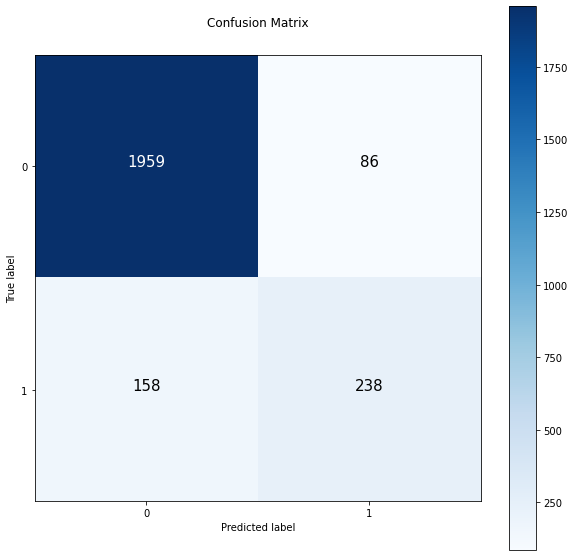

In [ ]:
make_confusion_matrix(y_test, y_pred)

## Model 5: model 4 with feature selection

In [ ]:
#https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
  plt.figure(figsize=(15,5))
#Plot Searborn bar chart
  sns.set_color_codes("muted")
  #sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  sns.barplot(x=fi_df['feature_names'], y=fi_df['feature_importance'])
#Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE NAMES')
  plt.ylabel('FEATURE IMPORTANCES')

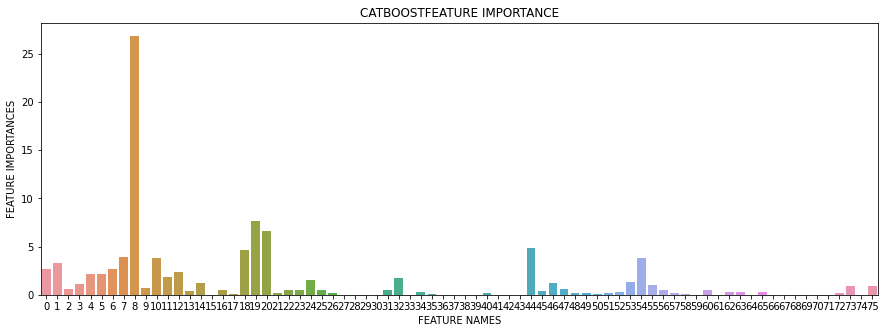

In [ ]:

plot_feature_importance(model_4.get_feature_importance(),pd.DataFrame(X_train_smote).columns,'CATBOOST')

In [200]:
params_space = {   
    'criterion': 'entropy',
    'max_depth': 16,
    'max_features': 'auto',
    'min_samples_leaf': 10,
    'min_samples_split': 5,
    'n_estimators': 35
}
select_clf = CatBoostClassifier(iterations=1000,                          
                           devices='0:1',
                           verbose=0)
feat_selector = SelectFromModel(select_clf)
feat_selector.fit(X_train_smote, y_train_smote)
feats = feat_selector.transform(X_train_smote)

In [198]:
from catboost import CatBoostClassifier
model_5 = CatBoostClassifier(iterations=1000,                          
                           devices='0:1',
                           verbose=0)
%time model_5.fit(feats, y_train_smote)
y_pred = model_5.predict(X_test)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

CPU times: user 11.8 s, sys: 799 ms, total: 12.6 s
Wall time: 6.74 s


In [201]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.57      0.66      2045
           1       0.08      0.20      0.12       396

    accuracy                           0.51      2441
   macro avg       0.43      0.38      0.39      2441
weighted avg       0.67      0.51      0.57      2441



The experimentation shows that the model 5 with feature selection performed less than the model 4.

## Model_6: Model 4 with optimization 

In [225]:
from sklearn.model_selection import RandomizedSearchCV

In [258]:
#The model 4 was pretty good let's look at the parametter
print(model_4.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'Logloss', 'learning_rate': 0.024250999093055725, 'score_function': 'Cosine', 'task_type': '

We will optimize:
* the learning rate
* Depth
* Iteration


In [269]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt 
parameters = {'depth'         : sp_randInt(4, 10),
                  'learning_rate' : sp_randFloat(0.001, 0.1),
                  #'iterations'    : sp_randInt(800, 1500)
                  'iterations':[100 ,1000, 1300, 1500]
                 }

In [270]:
cb=CatBoostClassifier()

In [271]:
randm = RandomizedSearchCV(estimator=cb, param_distributions= parameters, 
                               cv = 3, n_iter = 10, n_jobs=-1)

In [272]:
randm.fit(X_train_smote, y_train_smote)
print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)

0:	learn: 0.6476846	total: 45ms	remaining: 58.5s
1:	learn: 0.6059188	total: 77.1ms	remaining: 50s
2:	learn: 0.5725875	total: 108ms	remaining: 46.8s
3:	learn: 0.5468400	total: 141ms	remaining: 45.8s
4:	learn: 0.5195036	total: 185ms	remaining: 47.8s
5:	learn: 0.4937534	total: 217ms	remaining: 46.9s
6:	learn: 0.4702820	total: 255ms	remaining: 47.1s
7:	learn: 0.4528641	total: 287ms	remaining: 46.4s
8:	learn: 0.4355963	total: 319ms	remaining: 45.7s
9:	learn: 0.4208248	total: 350ms	remaining: 45.2s
10:	learn: 0.4043774	total: 384ms	remaining: 45s
11:	learn: 0.3915079	total: 416ms	remaining: 44.7s
12:	learn: 0.3824068	total: 449ms	remaining: 44.5s
13:	learn: 0.3729709	total: 488ms	remaining: 44.8s
14:	learn: 0.3652746	total: 521ms	remaining: 44.6s
15:	learn: 0.3566368	total: 552ms	remaining: 44.3s
16:	learn: 0.3500764	total: 586ms	remaining: 44.2s
17:	learn: 0.3437741	total: 617ms	remaining: 43.9s
18:	learn: 0.3390425	total: 647ms	remaining: 43.6s
19:	learn: 0.3327977	total: 680ms	remaining: 

In [273]:
from catboost import CatBoostClassifier
model_6 = CatBoostClassifier(depth=8, iterations= 1300, devices='0:1',learning_rate=0.04628434728633249)
%time model_6.fit(X_train_smote, y_train_smote, verbose=0)
y_pred = model_6.predict(X_test)

CPU times: user 1min 21s, sys: 1.54 s, total: 1min 23s
Wall time: 43.5 s


In [274]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2045
           1       0.66      0.69      0.67       396

    accuracy                           0.89      2441
   macro avg       0.80      0.81      0.80      2441
weighted avg       0.89      0.89      0.89      2441



In [275]:
result_model_6=calculate_results(y_true=y_test, y_pred=y_pred)
result_model_6

{'accuracy': 89.14379352724293,
 'f1': 0.8926628185078923,
 'precision': 0.8941123205926425,
 'recall': 0.8914379352724293}

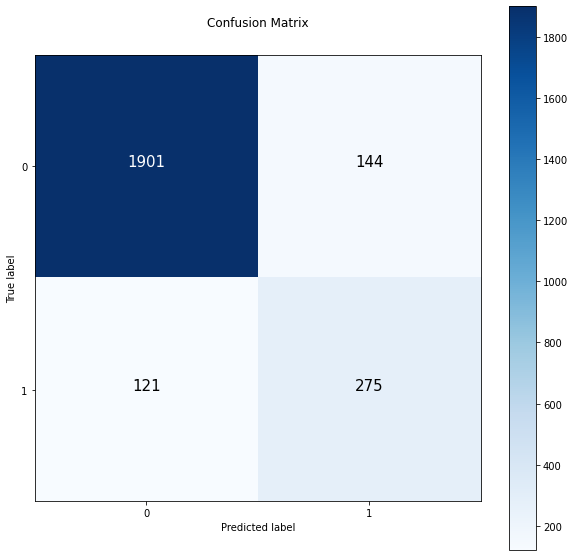

In [276]:
make_confusion_matrix(y_test, y_pred)

In [278]:
y_pred_train_model_4=model_4.predict(X_train_smote)

In [280]:
result_train_model_4=calculate_results(y_train_smote,y_pred_train_model_4)
result_train_model_4

{'accuracy': 95.21885521885521,
 'f1': 0.9519691247398092,
 'precision': 0.9520451506423654,
 'recall': 0.9521885521885521}

In [253]:
result_model_4

{'accuracy': 89.59442851290454,
 'f1': 0.896669292651563,
 'precision': 0.8974798980034443,
 'recall': 0.8959442851290454}

## Model_7: Model 4 with regularization to decrease our overfitting

https://catboost.ai/en/docs/references/training-parameters/#l2_leaf_reg

In [1]:
from catboost import CatBoostClassifier
model_7 = CatBoostClassifier(iterations=1000,                          
                           devices='0:1',
                           verbose=0,
                           l2_leaf_reg=20)
%time model_7.fit(X_train_smote, y_train_smote)
y_pred = model_7.predict(X_test)

ModuleNotFoundError: ignored

In [296]:
result_model_7=calculate_results(y_test,y_pred)
result_model_7

{'accuracy': 89.9631298648095,
 'f1': 0.9007637378657871,
 'precision': 0.90212740570091,
 'recall': 0.899631298648095}

In [297]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2045
           1       0.68      0.72      0.70       396

    accuracy                           0.90      2441
   macro avg       0.81      0.83      0.82      2441
weighted avg       0.90      0.90      0.90      2441



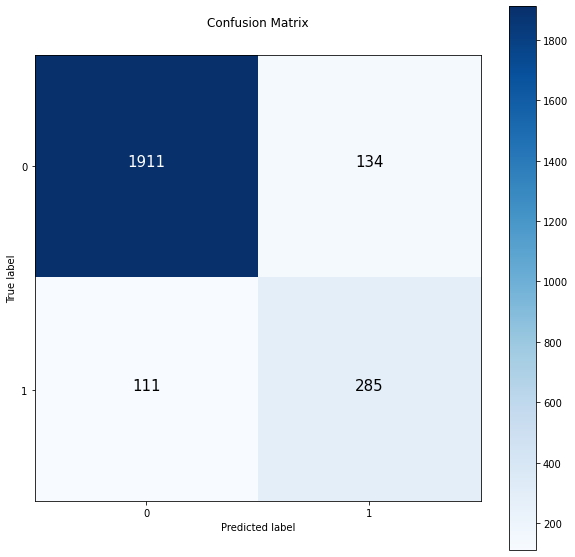

In [308]:
make_confusion_matrix(y_test, y_pred)

In [306]:
def compare_model_to_new_results(result_model, new_model_results):
  for key, value in result_model.items():
    print(f"Model_4 {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

In [307]:
compare_model_to_new_results(result_model=result_model_4, new_model_results=result_model_7)


Model_4 accuracy: 89.59, New accuracy: 89.96, Difference: 0.37
Model_4 precision: 0.90, New precision: 0.90, Difference: 0.00
Model_4 recall: 0.90, New recall: 0.90, Difference: 0.00
Model_4 f1: 0.90, New f1: 0.90, Difference: 0.00


Finally the model_7 outperformed the model 4, we have our champion for the prediction of the project.
We could have add more data or create new feature to improve our model.

* Accuracy: 89.9631298648095,
* f1 : 0.9007637378657871,
* precision: 0.90212740570091,
* recall: 0.899631298648095